<h1><center>Laboratorio 4: ¿Superhéroe o Villano? 🦸</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Joaquin Ortega
- Nombre de alumno 2: María José Zambrano


### **Link de repositorio de GitHub:** https://github.com/mzambrano1/Lab-programacion-cientifica

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Clasificación con texto.
- Clasificación en `scikit-learn`.
- Modelos a través del uso de `pipeline`.
- Optimización de modelos usando `GridSearchCV`.

## Reglas:

- Fecha de entrega: 4/06/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar las ventajas que nos ofrece crear un pipeline.
- Obtener caracteristicas desde texto.
- Crear modelos de clasificación de texto.
- Optimizar la clasificación de texto usando wordclouds.
- Usar herramientas de visualización de texto como las wordclouds.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [1]:
# Librería Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# Librería para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Proyecciones en baja dimensionalidad: UMAP
!pip install umap-learn

# Librería para NLP
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 13.2MB 210kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.2MB 9.3MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=6128e5f33c2ae99c8201b2229da63c00d83a3eb2e8678b9bfb654118f7e21261
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=9c28d628946aa1316134f6f900fcd694469c03e2f8082a632d992568b07962a7
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package st

True

# 1. ¿Quien es Bat Cow?

<p align="center">
  <img src="https://static.wikia.nocookie.net/p__/images/a/a2/Bat-Cow.jpg/revision/latest?cb=20180108185037&path-prefix=protagonist" width="350">
</p>

En vez de estar oprotunamente desarrollando las tareas y las evaluaciones correspondientes al curso, su profesor de catedra y su auxiliar discuten acerca la alineación del personaje de ficción *Bat-Cow*. 

El cuerpo docente, no logra ponerse de acuerdo acerca de la alineación del personaje, es decir, si lucha junto a las fuerzas del bien, si neutral a cualquier eventualidad o derechamente es un villano.
El auxiliar plantea (de forma superficial) que *Bat-cow* posee una siniestra mirada, común característica de los personajes malvados. 
Por otra parte, extendiendo las ideas de Rousseau, el profesor (*se cree filósofo... y*) plantea que tal como los humanos no nacen malos, no existe motivo por el cual un rumiante humanizado con superpoderes deba serlo.

Sin embargo, ambos concuerdan en es difícil estimar la alineación solo usando los atributos físicos, por lo que creen el análisis debe ser complementado aún más antes de comunicarle los resultados a su estudiantado. Buscando más información, ambos sujetos se percatan de la existencia de un excelente antecedente para estimar la alineación: la historia personal de cada superhéroe o villano.

Es por esto le solicitan que construya y optimice un clasificador basado en texto el cual analice la alineación de cada personaje basado en su historia personal.

Para este laboratorio deben trabajar con los datos `df_comics.csv` y `comics_no_label.csv` subidos a u-cursos. El primero es un conjunto de datos que les servirá para entrenar un modelo de clasificación, mientras que el segundo es un dataset con personajes de ficción no etiquetados a predecir (sí, aquí está la misteriosa Batcow).

Para iniciar este laboratorio, cargue los dataset señalados y visualice a través de la función `head` los atributos que poseen cada uno de los dataset.


In [2]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    dir = '/content/drive/MyDrive/LAB4//'
except ModuleNotFoundError:
    import os
    path = os.getcwd()

Mounted at /content/drive


In [3]:
df_comics = pd.read_csv(dir+'df_comics.csv')
df_comics_no_label = pd.read_csv(dir+'comics_no_label.csv')

In [4]:
print(df_comics.shape)
print(df_comics_no_label.shape)

(1367, 82)
(84, 82)


In [5]:
df_comics.head(2)

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,...,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,40,70,"['Super Speed', 'Super Strength']",[],[''],NaN,NaN,Marvel Comics,Good,NaN,NaN,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10038.jpg?v=156096...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,100,80,"['Accelerated Healing', 'Agility', 'Berserk Mo...",[],['Rick Jones'],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,"Musician, adventurer, author; formerly talk sh...",NaN,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,NaN,/pictures2/portraits/10/050/10060.jpg?v=158233...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
df_comics_no_label.head(2)

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,...,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,35,100,"['Durability', 'Reflexes', 'Super Strength']","['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",NaN,NaN,DC Comics,NaN,NaN,NaN,[],Bruce Wayne (genetic template),NaN,NaN,-,-,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,14,Ace Morgan,Kyle Morgan,NaN,7,NaN,"Aviation: Ace is an extremely skilled pilot, ...",85,20,65,55,80,90,"['Agility', 'Banish', 'Energy Blasts', 'Enhanc...",[],[''],NaN,NaN,DC Comics,NaN,NaN,NaN,['Challengers of the Unknown'],NaN,NaN,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/11545.jpg?v=156107...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


## 1.1 Obtención de Features [2 puntos]

<p align="center">
  <img src="https://media0.giphy.com/media/eIUpSyzwGp0YhAMTKr/200.gif" width="300">
</p>

Su primera tarea consiste en generar un vector de características para el atributo `history_text`. En este atributo se presenta una breve descripción de la historia de cada uno de los personajes de ficción presentes en el dataset (si un personaje tiene este atributo nulo, elimínelo). Luego, para obtener características de texto aplique el modelo de conteo `bag of words` de la siguiente forma:

- Utilice `CountVectorized` junto al tokenizador (que le proveemos) `LemmaTokenizer`.
- Obtenga caracteristicas de los 1-gramas y 2-gramas del texto (ver clase).
- Fijar un maximo de 10.000 caracteristicas para el vector de salida.

Finalmente, aplique `MinMaxScaler()` sobre `atributos_de_interes` y concatene el valor obtenido con el matriz de caracteristicas obtenidas con bag of words.

```python
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
```

No es necesario que obtenga un dataframe en concreto con las características solicitadas. Se le recomienda generar un `ColumnTransformer()` para aplicar las transformaciones solicitadas en un pipeline.

**To-Do:**
- [ ] Obtener a traves de bag of words caracteristicas del resumen de historia de cada personaje.
- [ ] Aplicar MinMaxScaler sobre los atributos de interes.

In [7]:
 df_comics = df_comics[df_comics.history_text.notna()]

In [8]:
stop_words = stopwords.words('english')

class LemmaTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

In [9]:
preprocessing_transformer = ColumnTransformer(transformers=[('scaler',MinMaxScaler(), ['intelligence_score', 'strength_score', 
                                                                       'speed_score', 'durability_score', 'power_score', 'combat_score']),
                                                            ('bow', CountVectorizer(tokenizer = LemmaTokenizer(), ngram_range= (1,2), max_features=10000), 'history_text')])

preprocessing_transformer2 = ColumnTransformer(transformers=[('scaler',MinMaxScaler(), ['intelligence_score', 'strength_score', 
                                                                       'speed_score', 'durability_score', 'power_score', 'combat_score']),
                                                            ('bow', CountVectorizer(tokenizer = LemmaTokenizer(), ngram_range= (1,2), max_features=10000), 'history_text')])


## 1.2 Diseño de Pipeline y  Primer Entrenamiento [1.5 puntos]


<p align="center">
  <img src="https://pa1.narvii.com/6374/9eaec1b7bf9157334151452a669516f9a78b954c_hq.gif" width="300">
</p>


A continuación, genere un Pipeline con las caracteristicas solicitadas en la sección 1.1, añadiendo un reductor de dimensionalidad llamado `TruncatedSVD()` ajustando el número de componentes en 1000 (este reducto de dimensionalidad es similar al PCA pero funciona para vectores dispersos) y un clasificador `MultinomialNB()` por defecto.  Luego, separe el conjunto de datos en un conjunto de entrenamiento y prueba, donde el etiquetado vendrá dado por el atributo `alignment`. Finalmente entrene el modelo y reporte el desempeño con un `classification_report`. ¿ Nos recomendaría predecir la alineación de BatCow con este clasificador?.

**Nota:** Debido al desbalance que existe entre las clases, puede ser util aplicar método de [`imbalanced-learn`](https://github.com/scikit-learn-contrib/imbalanced-learn) como RandomOverSampler sobre los datos de entrenamiento. 

**To-DO:**
- [ ] Realizar un pipeline con las caracteristicas solicitadas en 1.1,aplicar un reductor de dimensionalidad `TruncatedSVD` y aplicar un clasificador  `MultinomialNB()`.
- [ ] Entrenar el pipeline.
- [ ] (Opcional - **0.5 bonus**) Utilizar técnicas de Sampling para balancear los datos de entrenamiento.


In [10]:
pipeline = Pipeline([('Preprocessing', preprocessing_transformer),('clf', MultinomialNB())])

In [11]:
X , y = df_comics, df_comics['alignment']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.45      0.54      0.49       102
        Good       0.72      0.68      0.70       192
     Neutral       0.25      0.14      0.18        28

    accuracy                           0.59       322
   macro avg       0.47      0.45      0.46       322
weighted avg       0.59      0.59      0.59       322



In [13]:
df_comics['alignment'].value_counts()

Good       743
Bad        429
Neutral    113
Name: alignment, dtype: int64

In [14]:
int_columns = ['history_text','intelligence_score',	'strength_score',	'speed_score',	
               'durability_score',	'power_score',	'combat_score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1,stratify=y)

X_train = X_train[int_columns] 
over = RandomOverSampler(random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=int_columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
pipeline2 = Pipeline([('Preprocessing', preprocessing_transformer2),('clf', MultinomialNB())])
pipeline2.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.69      0.77      0.72       108
        Good       0.86      0.81      0.83       186
     Neutral       0.65      0.61      0.63        28

    accuracy                           0.78       322
   macro avg       0.73      0.73      0.73       322
weighted avg       0.78      0.78      0.78       322



LUego de entrenar el primer clasificador se puede notar que los resultados no son muy buenos, estos puede ser debido al desbalance entre las clases. Para resolver esto se utiliza la tecnica de oversampling, además de particionar los datos equitativamente en las calses (stratify) y se logran mejorar bastante los resultados.

Aún así los resultados no son óptimos, aún hay espacio para mejorar, por lo que no se recomendaría predecir la alineación de bat-cow con este clasificador si es que ser requiere un clasificación altamente confiable.

## 1.3 Entrenamiento con Grid Search [2 Puntos]

<p align="center">
  <img src="https://media1.tenor.com/images/70fdfeea52a8e2e4505498c230a0d2f9/tenor.gif?itemid=5134219" width="250">
</p>

No conformes con el rendimiento obtenido en la sección 1.2, el cuerpo docente les pide que realicen una búsqueda de grilla de los mejores hiperparámetros utilizando `GridSearchCV`. 

Para esto, se le solicita que defina al menos 3 configuraciones de hiperparámetros e intente obtener mejores resultados que los obtenidos en la sección anterior. 

A continuación, un ejemplo de parametros para GridSearch:

```python
params = [
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator1.
  # en este caso se entrenará el clasificador 1 con combinaciones de todos los 
  # parámetros de bow__max_features, bow__ngram_range, clf__n_estimators 
  # y se seleccionará la mejor combinación.
  {
  'bow__max_features': [5000, 10000, ...],
  'bow__ngram_range': [(1, 1), (1, 2), (1,3)],
  ...,
  'clf': [classificator1()],
  'clf__n_estimators': [200]
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator2:
  {'clf': [classificator2()],
   'clf__penalty': ['ovr'],
   'clf__multi_class': ['liblinear']
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator3:
  {'clf': [classificator3()]
  }
             ]
```

Además, note que puede obtener todos los parámetros configurables de un pipeline invocando sobre este el método `.get_params()`.

**Nota:** El GridSearch puede tomar tiempos de búsqueda exorbitantes, por lo que se le recomienda dejar corriendo el código y tomarse un tecito.

In [17]:
pipeline.get_params()

{'Preprocessing': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('scaler',
                                  MinMaxScaler(copy=True, feature_range=(0, 1)),
                                  ['intelligence_score', 'strength_score',
                                   'speed_score', 'durability_score',
                                   'power_score', 'combat_score']),
                                 ('bow',
                                  CountVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.int64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                         

In [18]:

params = [
  {
  'Preprocessing__bow__max_df': [0.8,0.9,1.0],
  'Preprocessing__bow__min_df': [0.5,0.4,0.3],
  'clf__alpha': [0,1,10]
  },
  {
  'Preprocessing__bow__ngram_range': [(1,2),(1,3),(2,3)],
  'Preprocessing__bow__max_features': [5000,10000,100000],
  'clf__alpha': [0,1,10]  
  },
  {
  'Preprocessing__bow__max_df': [0.8,0.9,1.0],
  'Preprocessing__bow__min_df': [0.5,0.4,0.3],
  'Preprocessing__bow__max_features': [5000,10000,100000]
  }

             ]

In [19]:
gs = GridSearchCV(pipeline2, params, n_jobs=-1)
gs.fit(df_comics, df_comics['alignment'])

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('Preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         ['intelligence_score',
                                                              

In [20]:
gs.best_params_

{'Preprocessing__bow__max_features': 5000,
 'Preprocessing__bow__ngram_range': (1, 2),
 'clf__alpha': 10}

In [21]:
gs.best_score_

0.6350194552529183

#### 1.3.1 Mejor configuración [0.5]

Comente cual fue la mejor configuración obtenida por Grid Search y por qué cree que esta fue la mejor.

La mejor configuración obtenida es la que fija el valor de las max feartures en 5000, el "alpha" del clasificador en 10 y deja el rango de los ngramas en (1,2). 

Una hipótesis del porqué este modelo puede funcionar mejor es, que debido a que contiene pocas palabras, el acortar el rango de estas que es considerado favorece a las más importantes haciendo que tenga un mejor rendimiento, esto en cuanto al hiperparámetro maxfeatures.
El que sea mejor consderar 1 y 2 gramas puede deberse al hecho de que los textos presentados son simples, por lo que no tiene un gran impacto el considerar palabras compuestas tan largas. 
El hiperparámetro alpha = 10 podría tener mejores resultados que menores valores debido a que este corresponde al hiperparámetro laplace smoothing del algortimo naive bayes,  lo que "amortigua" las probabilidades y podría favorecer a clases de baja ocurrencia, pese a que lo recomendado sea alpha = 1
.

## 1.4 Predicción del datos sin etiquetado

<p align="center">
  <img src="https://pbs.twimg.com/media/DolotxUUYAAbg7f.jpg" width="350">
</p>


Llego el momento de predecir cual es la verdadera alineación de `Batcow`. Para esto, deben escoger el mejor pipeline obtenido en las secciones anteriores y predecir la alineación de todos los datos presentes en `df_comics_no_label`.Luego, anexen las alineaciones obtenidas a su correspondiente columna  del dataframe original (atributo `alignment`) y busquen a los flamantes personajes `Batcow`, `Vergil`, y `Gorilla Girl'. Presente los resultados en un `Dataframe`.

**Nota:** Recuerde que pueden existir campos vacios en `history_text`, por lo que se les recomienda borrar los nan.

In [29]:
preprocessing_transformer = ColumnTransformer(transformers=[('scaler',MinMaxScaler(), ['intelligence_score', 'strength_score', 
                                                                       'speed_score', 'durability_score', 'power_score', 'combat_score']),
                                                            ('bow', CountVectorizer(tokenizer = LemmaTokenizer(), ngram_range= (1,2), max_features=5000), 'history_text')])

pipeline = Pipeline([('Preprocessing', preprocessing_transformer2),('clf', MultinomialNB(alpha = 10))])

In [30]:
pipeline.fit(df_comics.drop(columns=['alignment']),df_comics['alignment'])

Pipeline(memory=None,
         steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['intelligence_score',
                                                   'strength_score',
                                                   'speed_score',
                                                   'durability_score',
                                                   'power_score',
                                                   'combat_score']),
                                                

In [32]:
df_comics_no_label = df_comics_no_label[df_comics_no_label.history_text.notna()]

In [33]:
predictions = pipeline.predict(df_comics_no_label.drop(columns=['alignment']))

In [35]:
df_comics_no_label['alignment'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_comics_no_label.head()

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,...,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,35,100,"['Durability', 'Reflexes', 'Super Strength']","['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",NaN,NaN,DC Comics,Good,NaN,NaN,[],Bruce Wayne (genetic template),NaN,NaN,-,-,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,17,A'dal,NaN,NaN,7,"As with most of the naaru, little is known of ...",NaN,85,30,70,55,65,100,"['Element Control', 'Heat Generation', 'Light ...",[],[''],"Terrace of Light, Shattrath City",NaN,Blizzard Entertainment,Good,NaN,NaN,[],NaN,NaN,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/14754.jpg?v=156121...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,Agent Zero (FOX),David North,NaN,6,"During mid-late 1973, Zero was a member of Tea...",Zero can absorb kinetic energy to further incr...,90,10,25,25,35,80,"['Absorption', 'Agility', 'Energy Absorption',...",[],"['Maverick', 'Zero']",NaN,NaN,Marvel Comics,Good,NaN,NaN,[],NaN,NaN,Mutant,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/14359.jpg?v=155405...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31,Ajax (FOX),Francis,Francis Freeman,7,Ajax (born Francis Freeman) was a human who ga...,Ajax has claimed that the procedure to obtain ...,85,25,45,75,45,65,"['Dexterity', 'Durability', 'Intelligence', 'I...",['Ajax'],"['A British Villain', 'British Shitstick', 'Co...",NaN,NaN,Marvel Comics,Bad,NaN,NaN,[],NaN,Male,Mutant,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/14265.jpg?v=155393...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6,46,A.M.A.Z.O. (CW),NaN,NaN,22,The Anti Meta-human Adaptive Zootomic Organism...,"With its metallic body, it easily overpowered ...",90,100,100,100,100,100,"['Afterimage Creation', 'Cold Resistance', 'Cr...",[],[''],NaN,NaN,NaN,Bad,NaN,NaN,[],NaN,NaN,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/15565.jpg?v=156172...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_comics_no_label[(df_comics_no_label.name == 'Batcow') | (df_comics_no_label.name == 'Vergil') | (df_comics_no_label.name == 'Gorilla Girl')][['name','alignment']]

,name,alignment
16,Batcow,Good
40,Gorilla Girl,Bad
78,Vergil,Good
83,Batcow,Good


Finalemente Batcow resulta ser buena, según las prediccines de nuestro pipeline :)

### Wordclouds [Opcional- 0,5] 

Una buena pero informal forma de comunicar los resultados del trabajo con texto es generar Wordclouds. Este tipo de visualizaciones nos informan de forma gráfica cuales son las palabras más frecuentes según el tamaño de estas al ser posicionadas en un lienzo.
<center>
<img alt='Ejemplo de una Wordcloud de Starwars' src='https://amueller.github.io/word_cloud/_images/sphx_glr_a_new_hope_001.png' width=400/>

Ejemplo de una Wordcloud de Starwars

</center>
Dicho esto, como equipo docente nos encantaría conocer cuales son las palabras que caracterizan tanto a heroes como neutrales y a villanos y cuales son sus principales diferencias. Por esta razón, les pedimos como última tarea generar una wordcloud con las historias de cada personaje según cada alineamiento (clase). Pueden ocupar el dataset completo para esto. 


**Nota:** Recuerde eliminar las stopwords. Guías completas para generar las wordclouds, eliminar las stopwords y configurar los parámetros de las nubes creadas pueden ser encontradas en su [documentación oficial](https://amueller.github.io/word_cloud/) y en [datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python).





In [19]:
sw = set(STOPWORDS)

villanos = df_comics[df_comics['alignment'] == 'Bad']['history_text'].str.cat()
neutrales = df_comics[df_comics['alignment'] == 'Neutral']['history_text'].str.cat()
heroes = df_comics[df_comics['alignment'] == 'Good']['history_text'].str.cat()

### Heroes

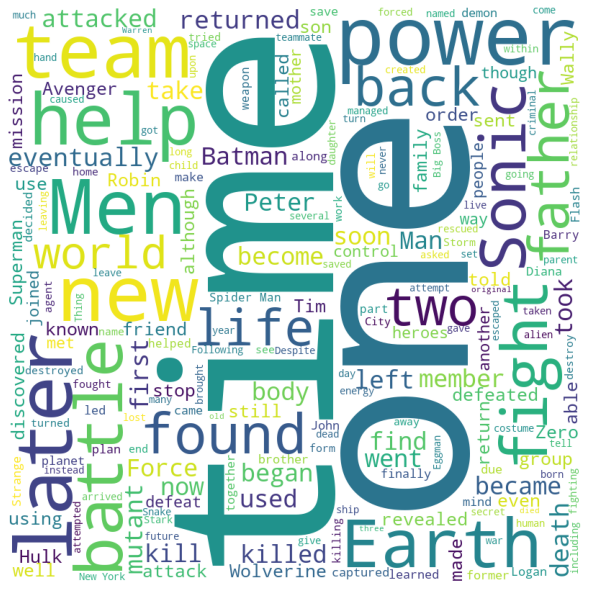

In [20]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = sw,
                min_font_size = 10).generate(heroes)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Neutrales

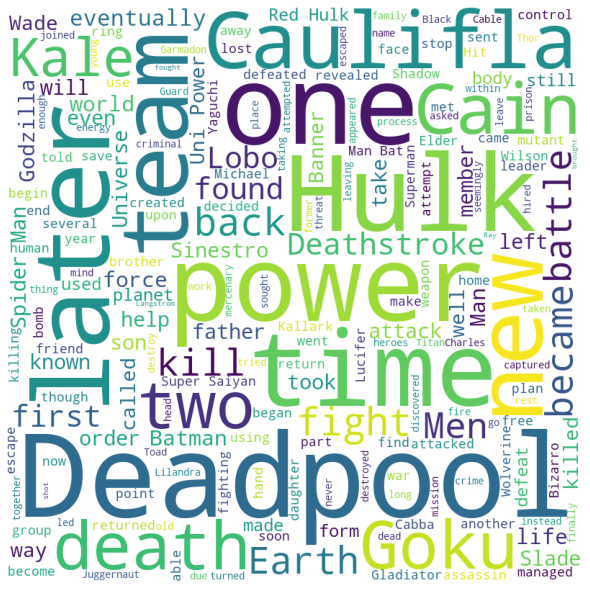

In [21]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = sw,
                min_font_size = 10).generate(neutrales)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Villanos

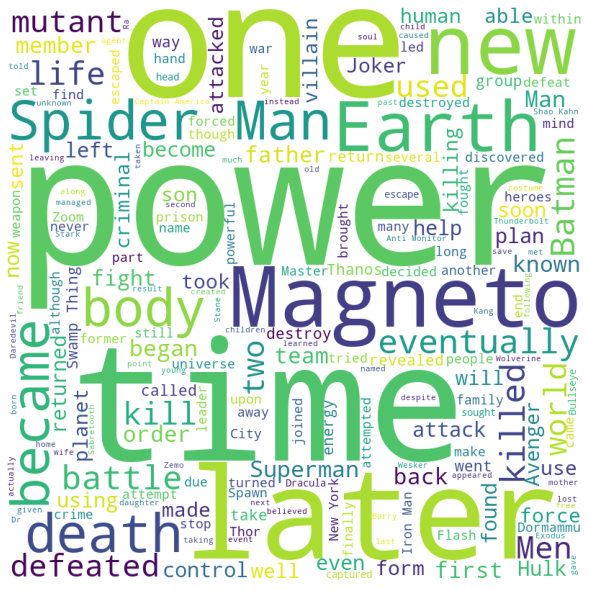

In [22]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = sw,
                min_font_size = 10).generate(villanos)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Comente las principales diferencias entre las tres wordclouds.
¿Hay palabras que caracterizen a los grupos y que no aparezcan en los otros?

contrario a lo que se podría creer, hay más similitudes que diferencias entre las 3 wordclouds, esto se puede ver en palabras como "power", "time" y "one". Sin embargo, en la de los villanos puede verse más términos como "kill" y "death" que tienen una connotación más negativa.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab, solo para tareas**. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>